# Feature Engineering for Missing values in the Dataset

### Q. What are the different types of missing data?

**1. Missing Completely at Random (MCAR):** Observations in a feature are said to be missing at random when the probabiltiy of a particular observation missing from the feature is not different than probability of any other observation missing from that feature. Disregarding such cases form the data would not have a negative impact on the predictive power of the model/inferences made. There is no relationship between the missing data and any other values.

In [29]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/suryapratapsingh/Downloads/titanic_train_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Age variable has 177 missing records
- Cabin variable has 687 missing records
- Embarked variable has 2 missing records

- Age & Cabin varibales are related to other missing/observed data within the dataset and therefore MNAR
- Embarked has no relationship and therefore MCAR

In [9]:
#MCAR
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**2. Missing not at Random:** Systematic missing values; there is a relationship between the missing data and any other - missing or observed data - within the datset

In [11]:
df['Cabin_Null'] = np.where(df['Cabin'].isnull(),1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [14]:
#find the percentage of NaN values
df['Cabin_Null'].mean()

0.7710437710437711

 - ~77% of the observation are NaN in Cabin feature

In [15]:
df.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

- From the above summary, we can conclude that for all the survived passengers the cabin information is missing for **~60%** of them and for passengers that did not survive, the cabin infomation is missing for **~87%** of them.**

**3. Missing at Random (MAR)**

-------------------------------------------------------------------------------------------------------------------

# All techniques for handling missing values

1. Imputating missing values with mean/median/mode
2. random sample imputation
3. capturing NaN values with a new feature
4. End of distribution imputation
5. arbitrary imputation
6. frequent categories imputation

**1. Imputating missing values with mean/median/mode**

- This imputation works on the assumption that the data is missing completely at random (MCAR). 
- In this method we replace the NaN with the most frequently occuring observation in the feature.

In [16]:
df = pd.read_csv('/Users/suryapratapsingh/Downloads/titanic_train_data.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
#check % of NaN values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

- Age feature has ~20% missing values therefore we will try to imputate the null values in this feature

In [18]:
#creating a function to imputate the null values
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [20]:
#find the mean for the feature with missing values
median = df['Age'].median()
median

28.0

In [21]:
#calling the impute function
impute_nan(df, 'Age', median)

In [23]:
#check % missing values after calling the function
df.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

**Age_median feature is the new feature derived from Age feature where missing values have been imputated with median value of the Age feature**

In [27]:
#Let's check the difference in stdev. betweeb Age & Age_median
std_Age = df['Age'].std()
std_Age_median = df['Age_median'].std()
print(f'Standard Deviation before imputating missing values in Age with median {std_Age}')
print(f'Standard Deviation after imputating missing values in Age with median {std_Age_median}')

Standard Deviation before imputating missing values in Age with median 14.526497332334044
Standard Deviation after imputating missing values in Age with median 13.019696550973194


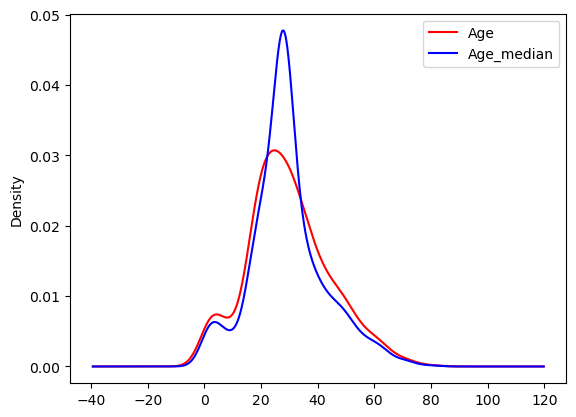

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='red')
df['Age_median'].plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

**here, the red plot represents the data distribution of Age feature with the missing values and the blue plot represents the data distribution of age feature after imputating with median values. It can be observed that after imputation the a lot of values are centered around median post the missing values age feature has been imputated with the median values**

**Advantages**
- Robust to outliers
- Faster way to obtain complete dataset

**Disadvantages**
- Change/Distortion in the original variance of the data
- impacts correlation

**2. Random Sample Imputation**